In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [6]:
model = joblib.load('keypoint_classifier_rf.joblib')

In [5]:

dataset = r'keypoint_logs.csv'

X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, 43)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=42)

In [7]:
y_probs = model.predict_proba(X_test)

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))
y_pred_one_hot = label_binarize(y_pred, classes=np.unique(y_test))

In [14]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

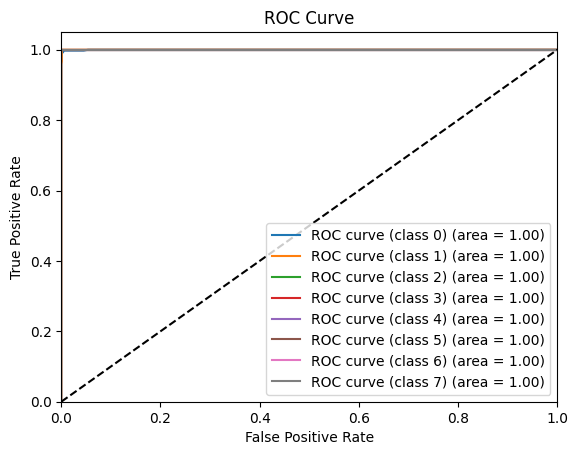

In [15]:
plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

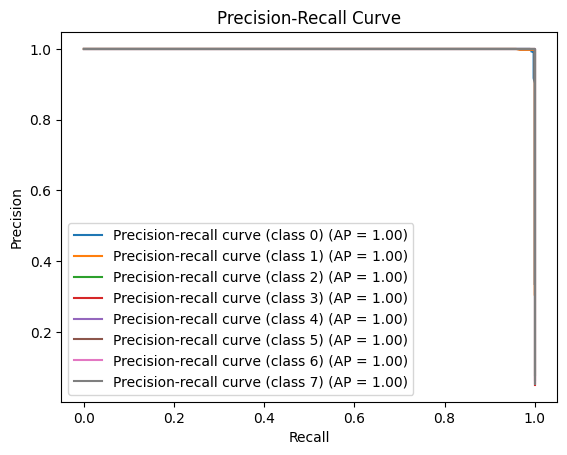

In [13]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_probs[:, i])

plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(recall[i], precision[i], label='Precision-recall curve (class {}) (AP = {:.2f})'.format(i, average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()